In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [7]:
path='/Users/bengieru/MLN/data/Johan_Clean_Traces_Features_and_Spikes/'

trace=open( path +"/m_1_session_1_baseline_trace.csv", "r")
spike=open( path +"/m_1_session_1_baseline_spikes_complexity.csv", "r")
reader_trace = csv.reader(trace)
reader_spike = csv.reader(spike)
traces=np.zeros((94,8000)) # roi x time
spikes=np.zeros((94,8000)) # roi x time
#row_count = sum(1 for row in reader)
for i,line in enumerate(reader_trace):
    for j in range(len(line)):
        traces[i][j]=line[j]
for i,line in enumerate(reader_spike):
    for j in range(len(line)):
        spikes[i][j]=line[j]

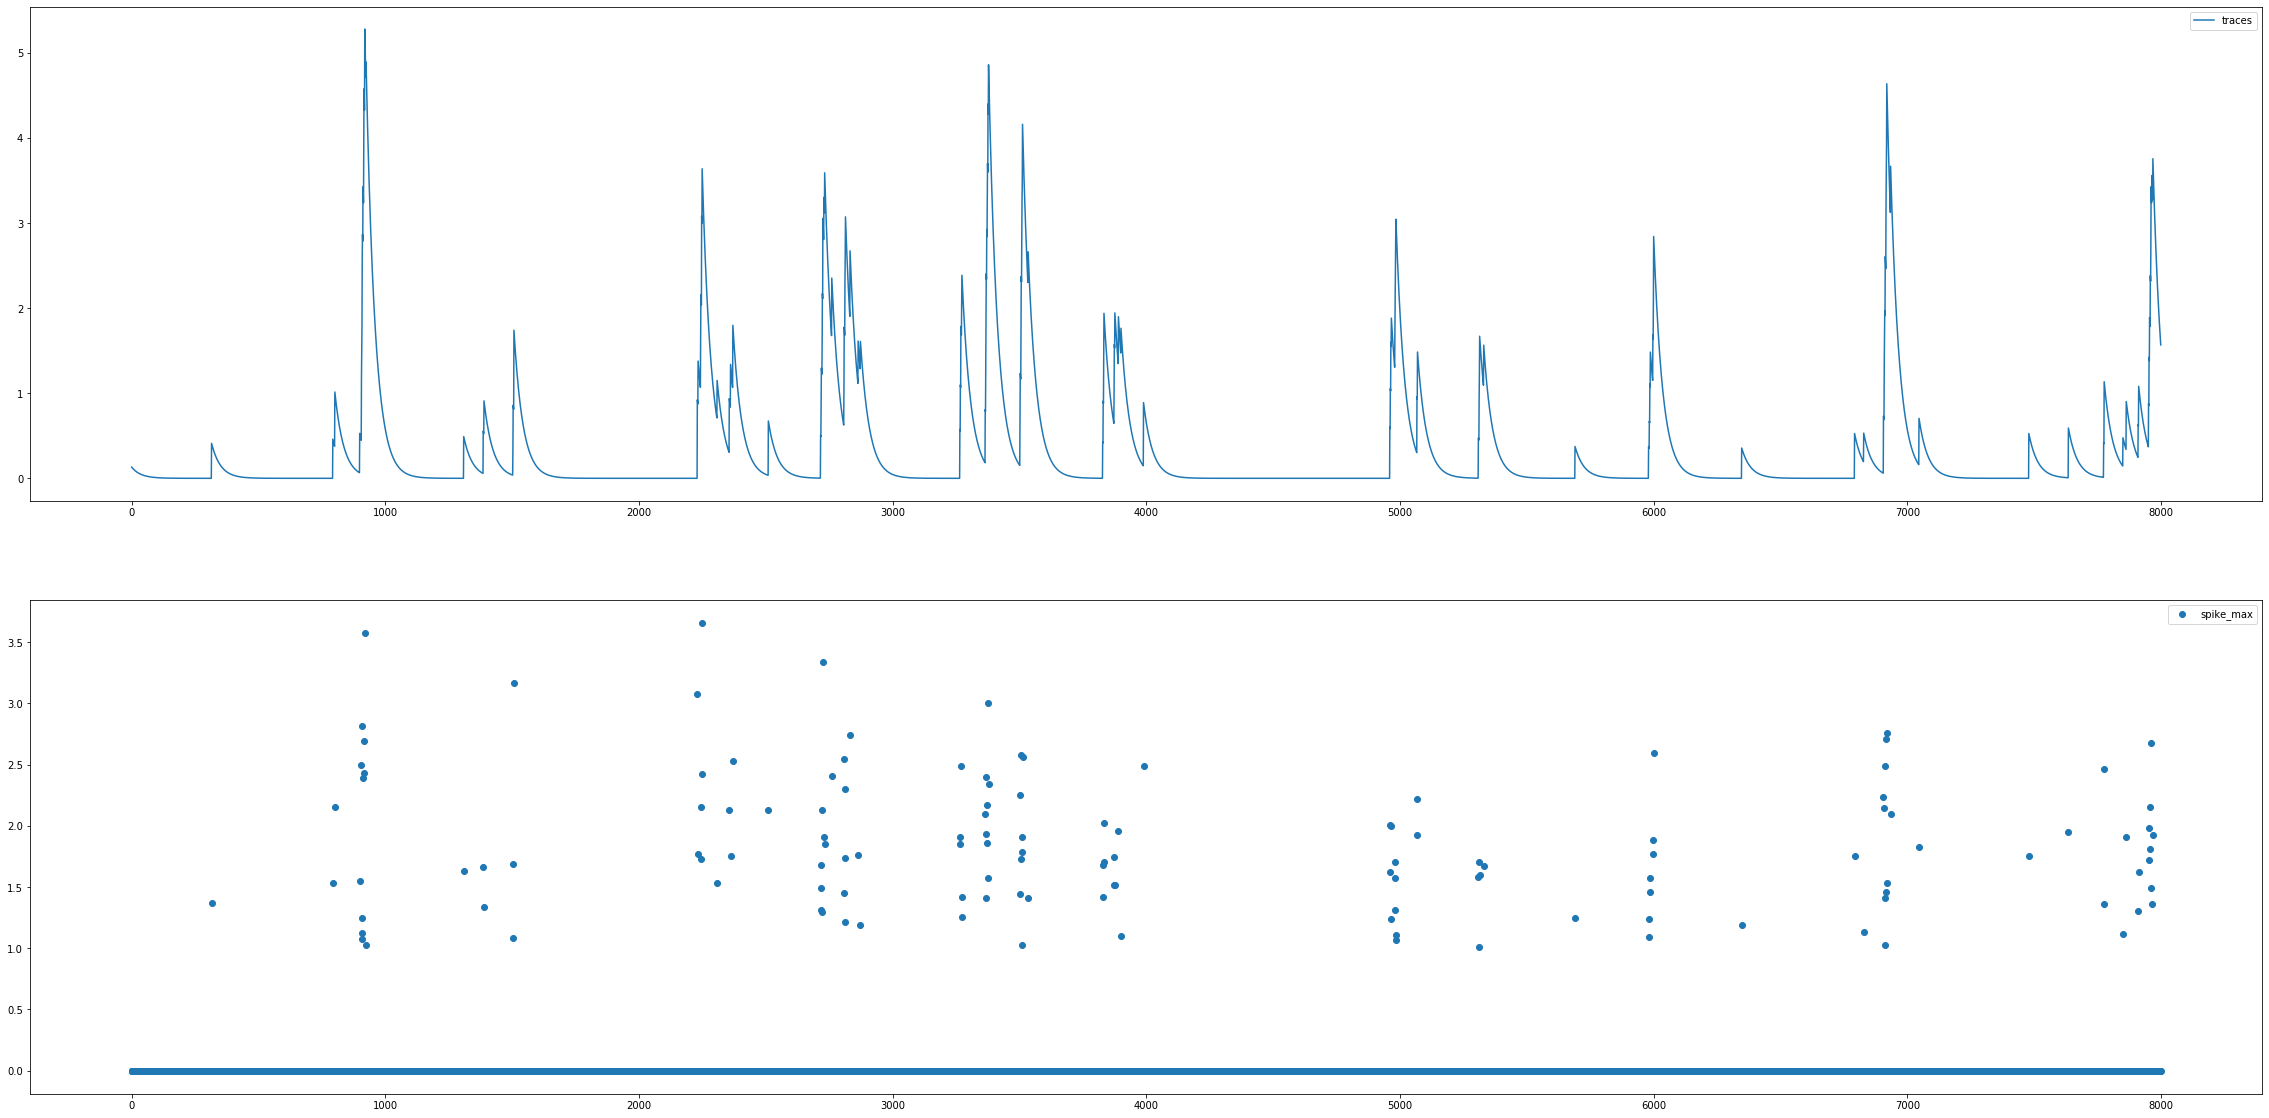

In [17]:
fig,ax=plt.subplots(2,1,figsize=(40,20))
y=np.arange(8000)
ax[0].plot(traces[42],label='traces')
ax[1].scatter(y,spikes[42],label='spike_max')
#ax.plot(spikes[0],label='spikes')
ax[0].legend()
ax[1].legend()

In [28]:
binned_spikes = []
for i in range(len(spikes)):
    binned_spikes.append(spikes[i].reshape(500,16))

In [35]:
spikes_bin = np.array(binned_spikes)

In [38]:
spikes_bin[0].shape

(500, 16)